In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
df = pd.read_csv("/Users/ethanjohn/Desktop/Data Science/Projects/MH_Dashboard2/Students_Social_Media_Addiction_FE.csv")
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Student_ID                            705 non-null    int64  
 1   Age                                   705 non-null    int64  
 2   Gender                                705 non-null    object 
 3   Academic_Level                        705 non-null    object 
 4   Country                               705 non-null    object 
 5   Avg_Daily_Usage_Hours                 705 non-null    float64
 6   Most_Used_Platform                    705 non-null    object 
 7   Affects_Academic_Performance          705 non-null    object 
 8   Sleep_Hours_Per_Night                 705 non-null    float64
 9   Mental_Health_Score                   705 non-null    int64  
 10  Relationship_Status                   705 non-null    object 
 11  Conflicts_Over_Soci

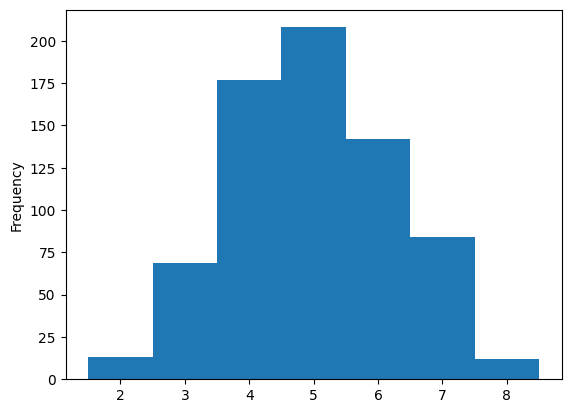

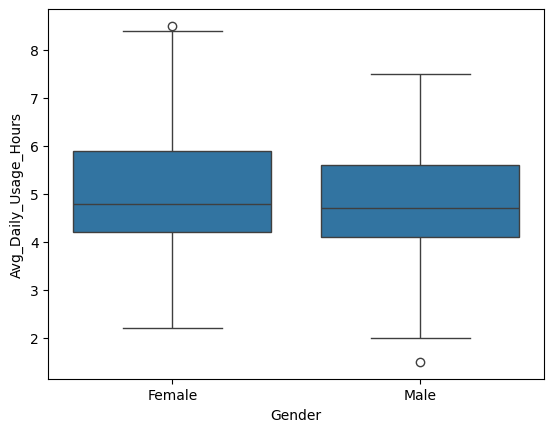

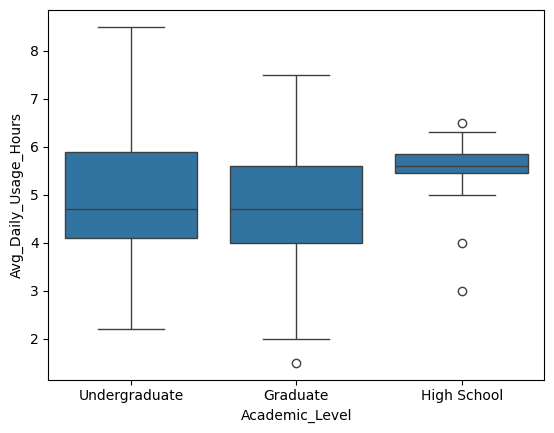

In [2]:
#General Usage Patterns
x = df["Avg_Daily_Usage_Hours"]
x.plot(kind="hist", bins=7)
plt.show()
sns.boxplot(x="Gender", y = "Avg_Daily_Usage_Hours", data=df)
plt.show()
sns.boxplot(x="Academic_Level", y = "Avg_Daily_Usage_Hours", data=df)
plt.show()

In [14]:
corr = df.corr(numeric_only=True)

threshold = 0.5
high_corr_pairs = (
    corr.where(abs(corr) >= threshold)
        .stack()              # drop NaNs
        .reset_index()
)

high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# remove duplicates (A,B) vs (B,A)
high_corr_pairs = high_corr_pairs[high_corr_pairs["Feature1"] < high_corr_pairs["Feature2"]]

high_corr_pairs.sort_values(by="Correlation", ascending=False)


,Feature1,Feature2,Correlation
25,Mental_Health_Score,Wellbeing_Score,0.950092
38,Addicted_Score,Conflicts_Over_Social_Media,0.933586
17,Sleep_Hours_Per_Night,Wellbeing_Score,0.872006
42,Addicted_Score,Affects_Academic_Performance_Encoded,0.866049
63,Affects_Academic_Performance_Encoded,Conflicts_Over_Social_Media,0.832030
35,Addicted_Score,Avg_Daily_Usage_Hours,0.832000
68,Academic_Level_Encoded,Age,0.824932
6,Avg_Daily_Usage_Hours,Conflicts_Over_Social_Media,0.804582
8,Avg_Daily_Usage_Hours,Sleep_Deficit,0.790582
40,Addicted_Score,Sleep_Deficit,0.764858


In [ ]:
# Random Thing I felt like doing

try:
    num = int(input("Enter numerator: "))
    den = int(input("Enter denominator: "))
    div = num / den
    print(str(div))
except ZeroDivisionError:
    print("Denominator cannot be zero")
except ValueError:
    print("Enter a value please!")
except Exception as e:
    print(f"Some other exception occured: {e}")
finally:
    print("Program executed")

0.0
Program executed


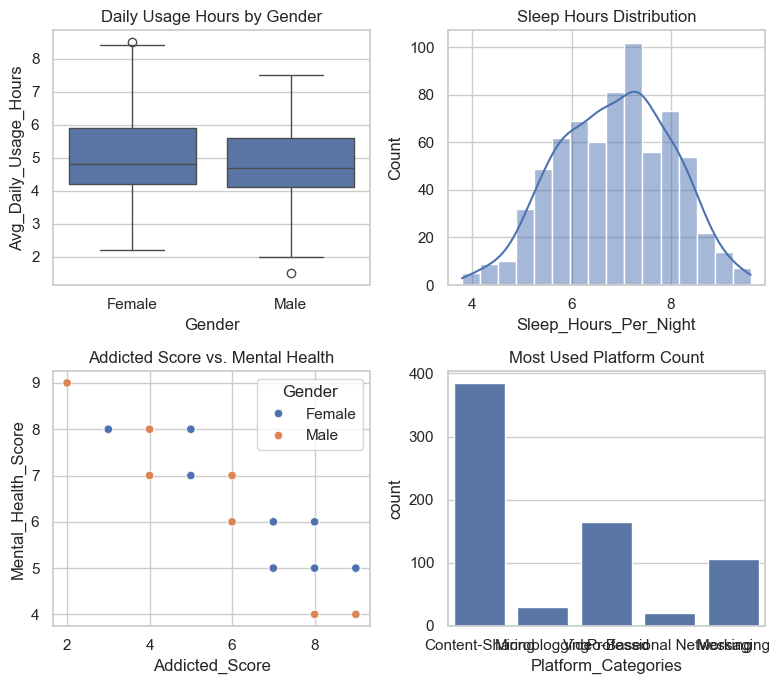

In [8]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))
#sns.lineplot(x=range(len(df)), y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])

sns.boxplot(x=df["Gender"], y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])
axes[0,0].set_title("Daily Usage Hours by Gender")


sns.histplot(df["Sleep_Hours_Per_Night"],kde=True, ax=axes[0,1])
axes[0,1].set_title("Sleep Hours Distribution")

sns.scatterplot(
    x=df["Addicted_Score"],
    y = df["Mental_Health_Score"], 
    hue=df["Gender"], 
    ax = axes[1,0]
    )
axes[1,0].set_title("Addicted Score vs. Mental Health")

sns.countplot(
    x = df["Platform_Categories"],
    ax = axes[1,1]
)
axes[1,1].set_title("Most Used Platform Count")
#axes[1,1].ticks_params(axis = "x", rotation=45)

plt.tight_layout()
plt.show()


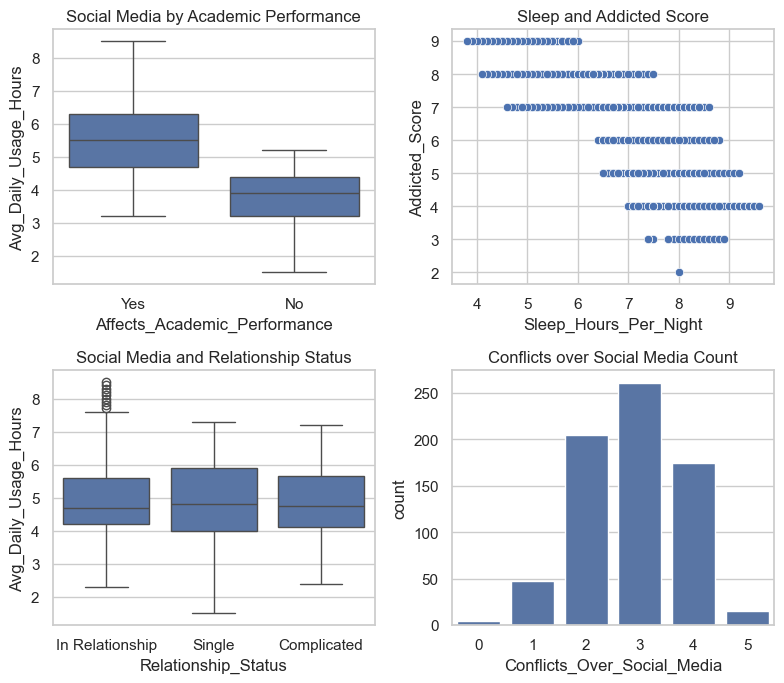

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))


sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Avg_Daily_Usage_Hours"], ax=axes[0,0])
axes[0,0].set_title("Social Media by Academic Performance")

sns.scatterplot(x=df["Sleep_Hours_Per_Night"], y = df["Addicted_Score"], ax=axes[0,1])
axes[0,1].set_title("Sleep and Addicted Score")

sns.boxplot(x=df["Relationship_Status"], y=df["Avg_Daily_Usage_Hours"], ax=axes[1,0])
axes[1,0].set_title("Social Media and Relationship Status")

sns.countplot(x=df["Conflicts_Over_Social_Media"], ax=axes[1,1])
axes[1,1].set_title("Conflicts over Social Media Count")

plt.tight_layout()
plt.show()



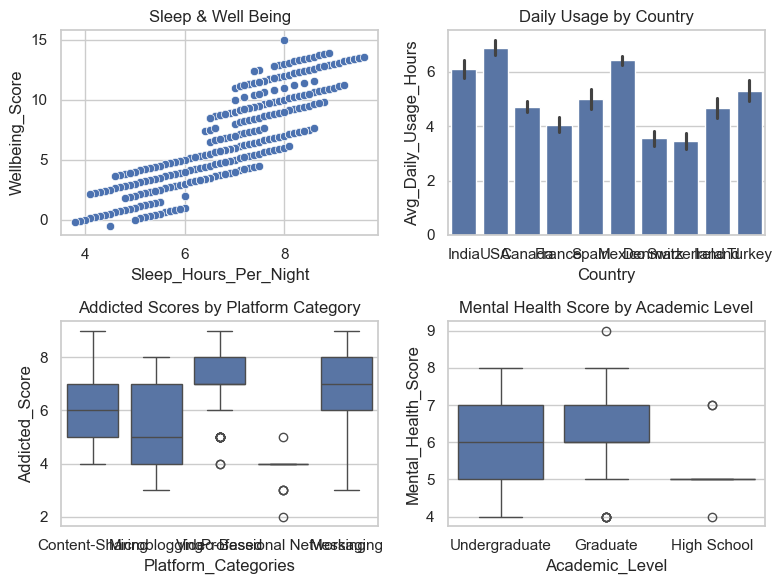

In [5]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,6))


sns.scatterplot(x=df["Sleep_Hours_Per_Night"], y = df["Wellbeing_Score"], ax=axes[0,0])
axes[0,0].set_title("Sleep & Well Being")

country_counts = df["Country"].value_counts()
countries_keep = country_counts[country_counts >= 25].index

df_filtered = df[df["Country"].isin(countries_keep)]

sns.barplot(x= df_filtered["Country"], y=df_filtered["Avg_Daily_Usage_Hours"], data=df_filtered, ax=axes[0,1])
axes[0,1].set_title("Daily Usage by Country")

sns.boxplot(x=df["Platform_Categories"], y=df["Addicted_Score"], ax=axes[1,0])
axes[1,0].set_title("Addicted Scores by Platform Category")

sns.boxplot(x=df["Academic_Level"], y=df["Mental_Health_Score"], ax=axes[1,1])
axes[1,1].set_title("Mental Health Score by Academic Level")


plt.tight_layout()
plt.show()


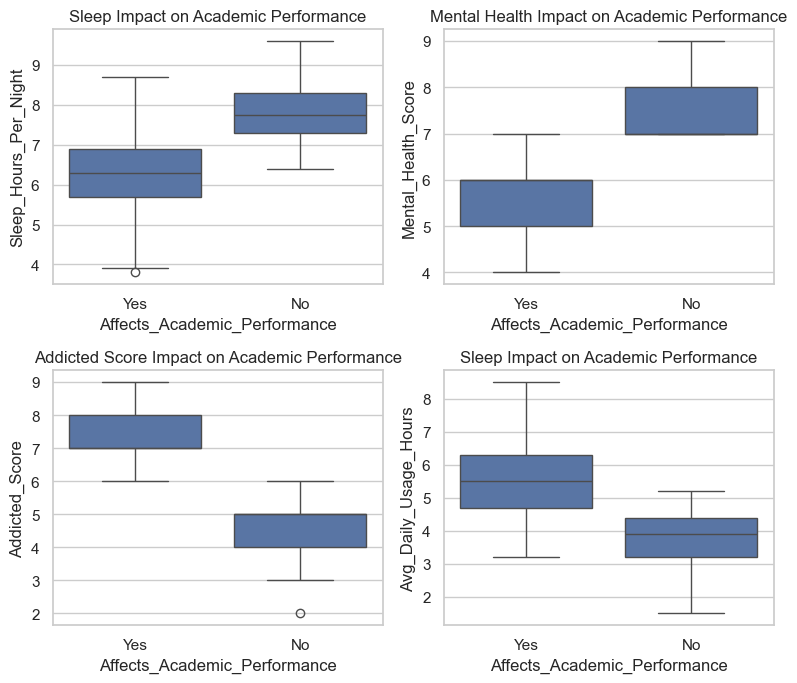

In [ ]:
#Graphs about academic performance

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(8,7))

# Compare affects_academic performance (yes/no) with these variables: Sleep, Mental Health, Addicted, Daily Hours

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Sleep_Hours_Per_Night"], ax=axes[0,0])
axes[0,0].set_title("Sleep Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Mental_Health_Score"], ax=axes[0,1])
axes[0,1].set_title("Mental Health Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Addicted_Score"], ax=axes[1,0])
axes[1,0].set_title("Addicted Score Impact on Academic Performance")

sns.boxplot(x=df["Affects_Academic_Performance"], y = df["Avg_Daily_Usage_Hours"], ax=axes[1,1])
axes[1,1].set_title("Sleep Impact on Academic Performance")

plt.tight_layout()
plt.show()


In [32]:
aap_corr = df.corr(numeric_only=True)["Affects_Academic_Performance_Encoded"].sort_values(ascending=False)
print(aap_corr)

Affects_Academic_Performance_Encoded    1.000000
Addicted_Score                          0.866049
Conflicts_Over_Social_Media             0.832030
Avg_Daily_Usage_Hours                   0.661474
Sleep_Deficit                           0.625373
Student_ID                              0.053780
Gender_Encoded                          0.024736
Academic_Level_Encoded                 -0.091373
Relationship_Status_Encoded            -0.115705
Age                                    -0.137140
Sleep_Hours_Per_Night                  -0.625373
Mental_Health_Score                    -0.808921
Wellbeing_Score                        -0.830285
Name: Affects_Academic_Performance_Encoded, dtype: float64
